In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [2]:
dataset = pd.read_csv('indian_liver_patient.csv')

In [3]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


<Axes: ylabel='Albumin_and_Globulin_Ratio'>

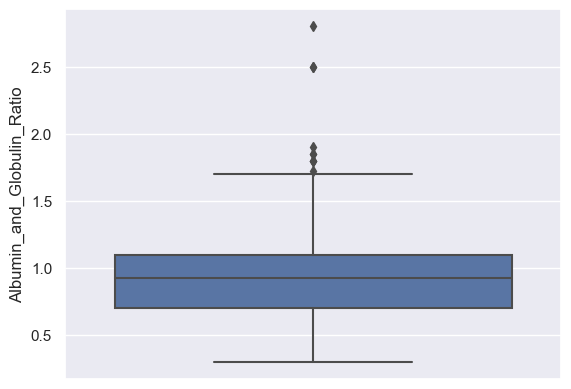

In [6]:
sns.boxplot(y='Albumin_and_Globulin_Ratio', data=dataset)

In [7]:
dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


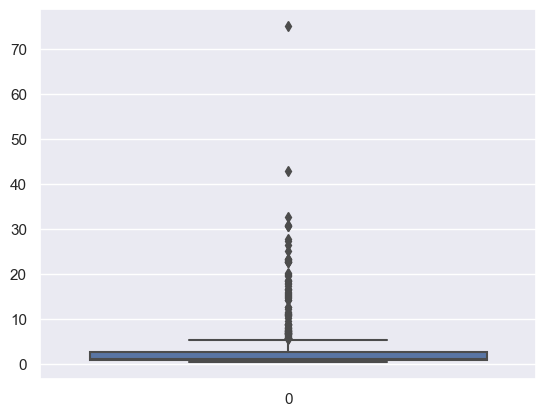

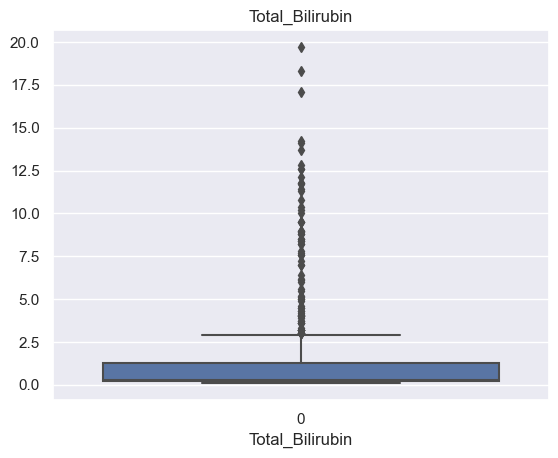

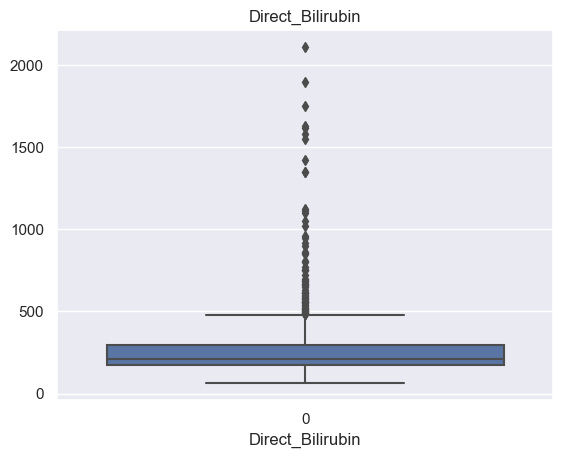

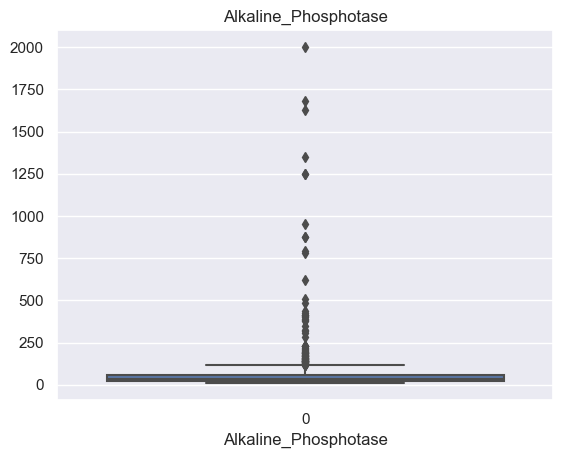

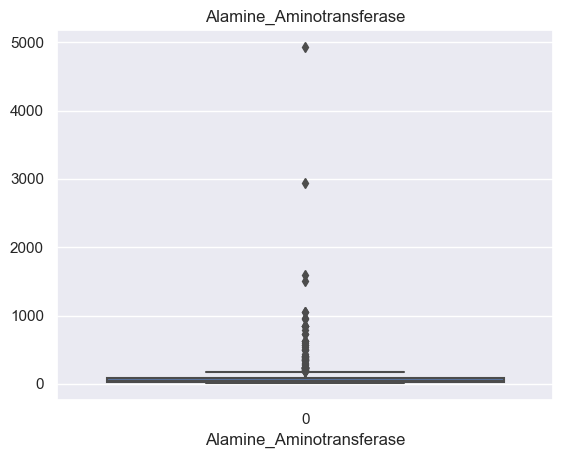

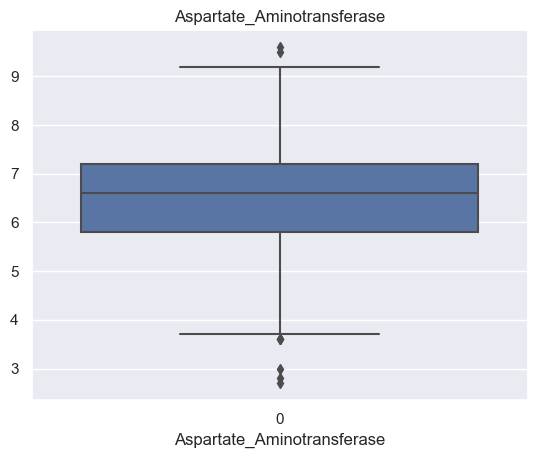

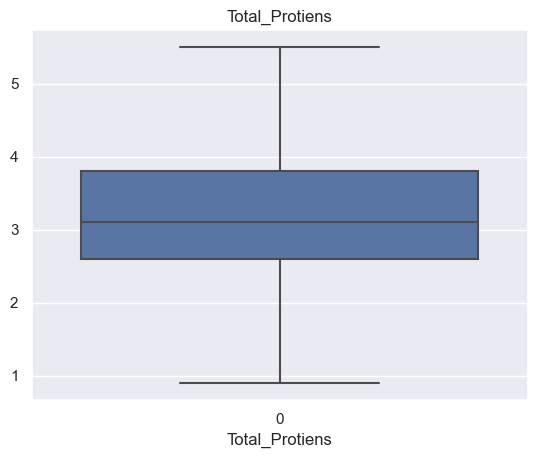

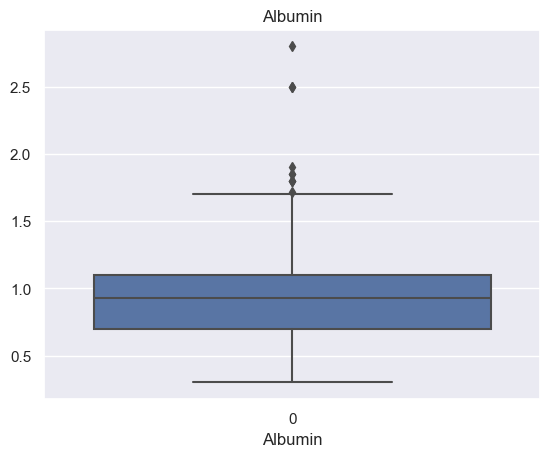

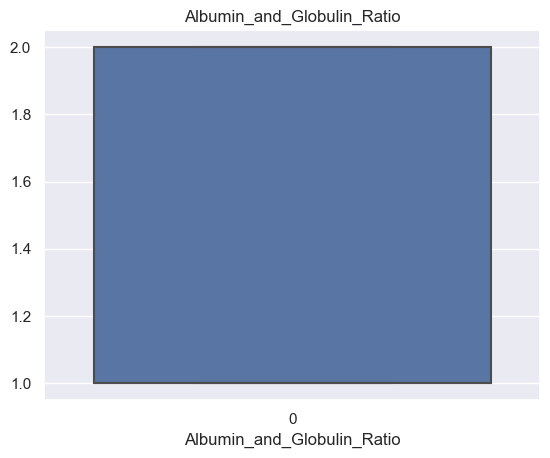

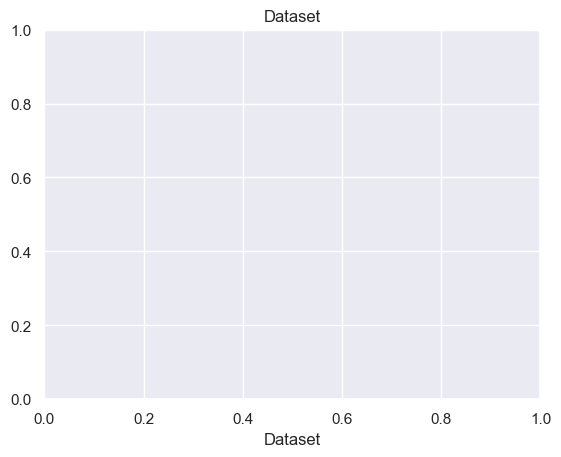

In [9]:
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)
    plt.title(i)
    plt.xlabel(i)

In [10]:
# Label Encoding

In [11]:
dataset.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [12]:
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender'] = dataset['Gender'].cat.codes

In [13]:
dataset.duplicated().sum()

13

In [14]:
dataset=dataset.drop_duplicates()

In [15]:
dataset.duplicated().sum()

0

In [16]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [17]:
dataset.Dataset.value_counts()

1    406
2    164
Name: Dataset, dtype: int64

In [18]:
# Data is imbalanced

In [19]:
# Splitting the data
x = dataset.drop(['Dataset'], axis=1)
y = dataset['Dataset']

In [20]:
x.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [22]:
# Feature Scaling Required

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x)
pd.DataFrame(x1).head()

,0,1,2,3,4,5,6,7,8,9
0,1.241741,-1.752549,-0.418647,-0.493702,-0.427421,-0.351482,-0.314428,0.279290,0.189737,-0.150447
1,1.056874,0.570597,1.210111,1.413923,1.661722,-0.086746,-0.032278,0.923059,0.064127,-0.653221
2,1.056874,0.570597,0.635255,0.919354,0.808927,-0.108807,-0.142385,0.463224,0.189737,-0.181870
3,0.810385,0.570597,-0.370743,-0.387723,-0.447823,-0.362513,-0.307546,0.279290,0.315348,0.163788
4,1.673096,0.570597,0.092336,0.177500,-0.394778,-0.290813,-0.173353,0.739125,-0.940754,-1.721618


In [23]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_sam, y_sam = ros.fit_resample(x1,y)
print(x_sam.shape, y_sam.shape, y.shape)

(812, 10) (812,) (570,)


<Axes: >

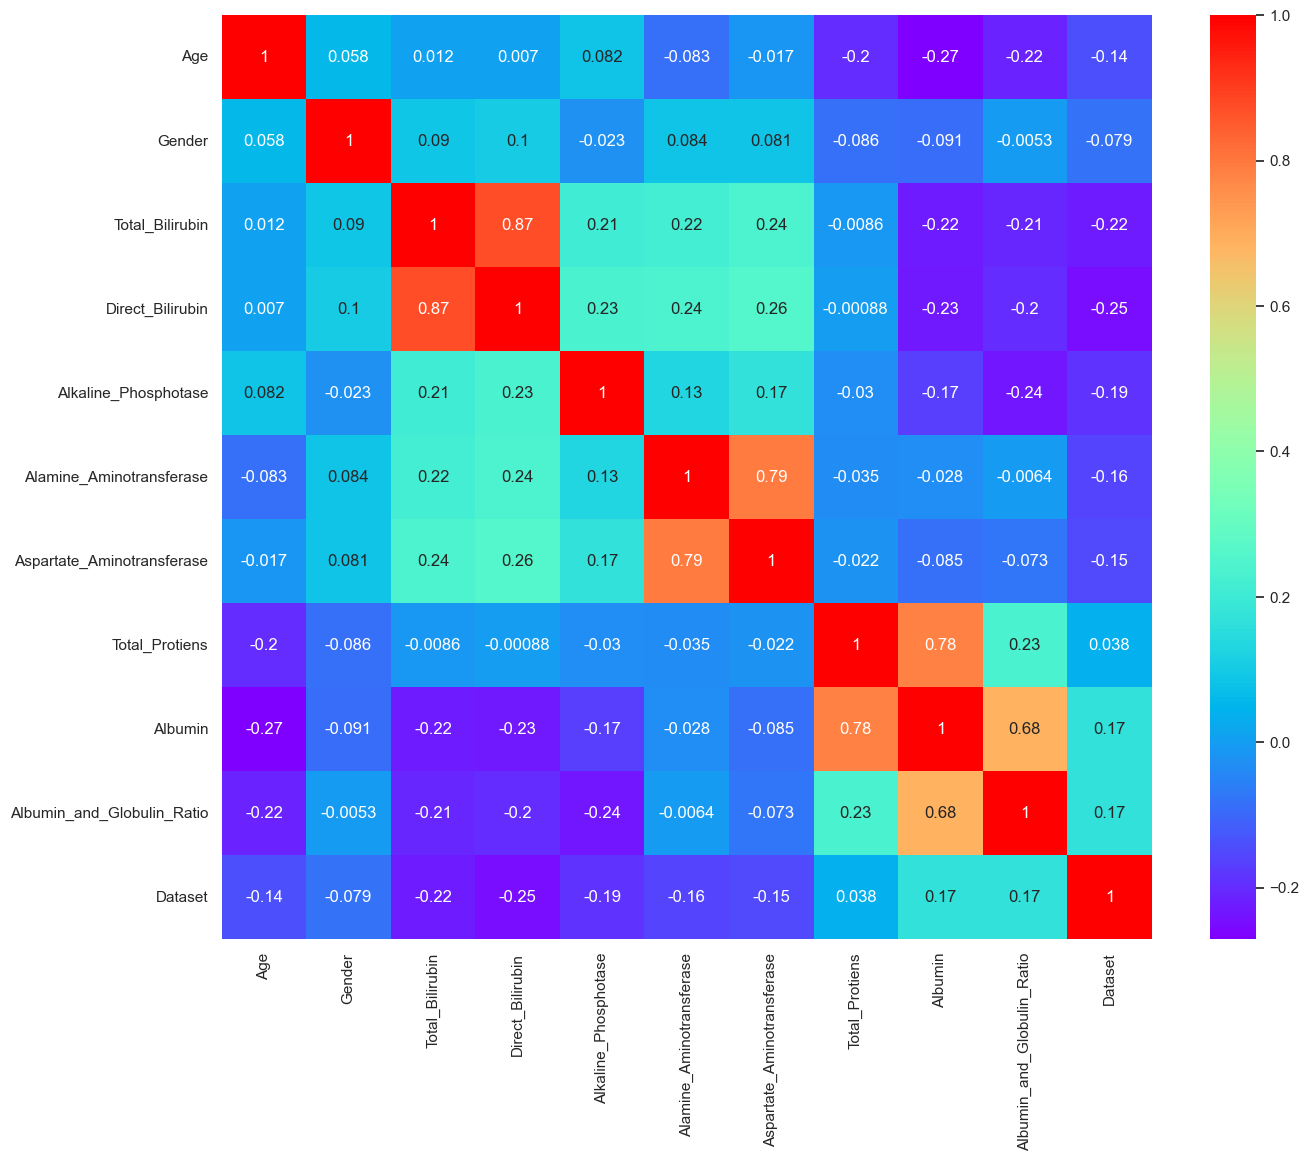

In [24]:
plt.figure (figsize=(15,12),dpi =100)
sns.heatmap(dataset.corr(), annot = True, cmap='rainbow')

In [25]:
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size=0.3, random_state=101)

In [26]:
# Building KNN Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Choose the best K-Value (HyperParameter Tunning)

In [29]:
error_rate=[]

for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append((np.mean(pred_i != y_test)))

In [30]:
error_rate

[0.20901639344262296,
 0.26229508196721313,
 0.29508196721311475,
 0.3442622950819672,
 0.3483606557377049,
 0.3483606557377049,
 0.36065573770491804,
 0.3442622950819672,
 0.36065573770491804,
 0.36475409836065575,
 0.32786885245901637,
 0.3237704918032787,
 0.2786885245901639,
 0.32786885245901637,
 0.29508196721311475,
 0.3155737704918033,
 0.319672131147541,
 0.3401639344262295,
 0.30327868852459017,
 0.29508196721311475,
 0.29098360655737704,
 0.29508196721311475,
 0.3114754098360656,
 0.3319672131147541,
 0.3319672131147541,
 0.319672131147541,
 0.32786885245901637,
 0.3319672131147541,
 0.3360655737704918,
 0.32786885245901637,
 0.3401639344262295,
 0.32786885245901637,
 0.3401639344262295,
 0.3483606557377049,
 0.3360655737704918,
 0.3319672131147541,
 0.3319672131147541,
 0.3319672131147541,
 0.3319672131147541,
 0.32786885245901637,
 0.3319672131147541,
 0.32786885245901637,
 0.3237704918032787,
 0.3483606557377049,
 0.3524590163934426,
 0.36065573770491804,
 0.36065573770491

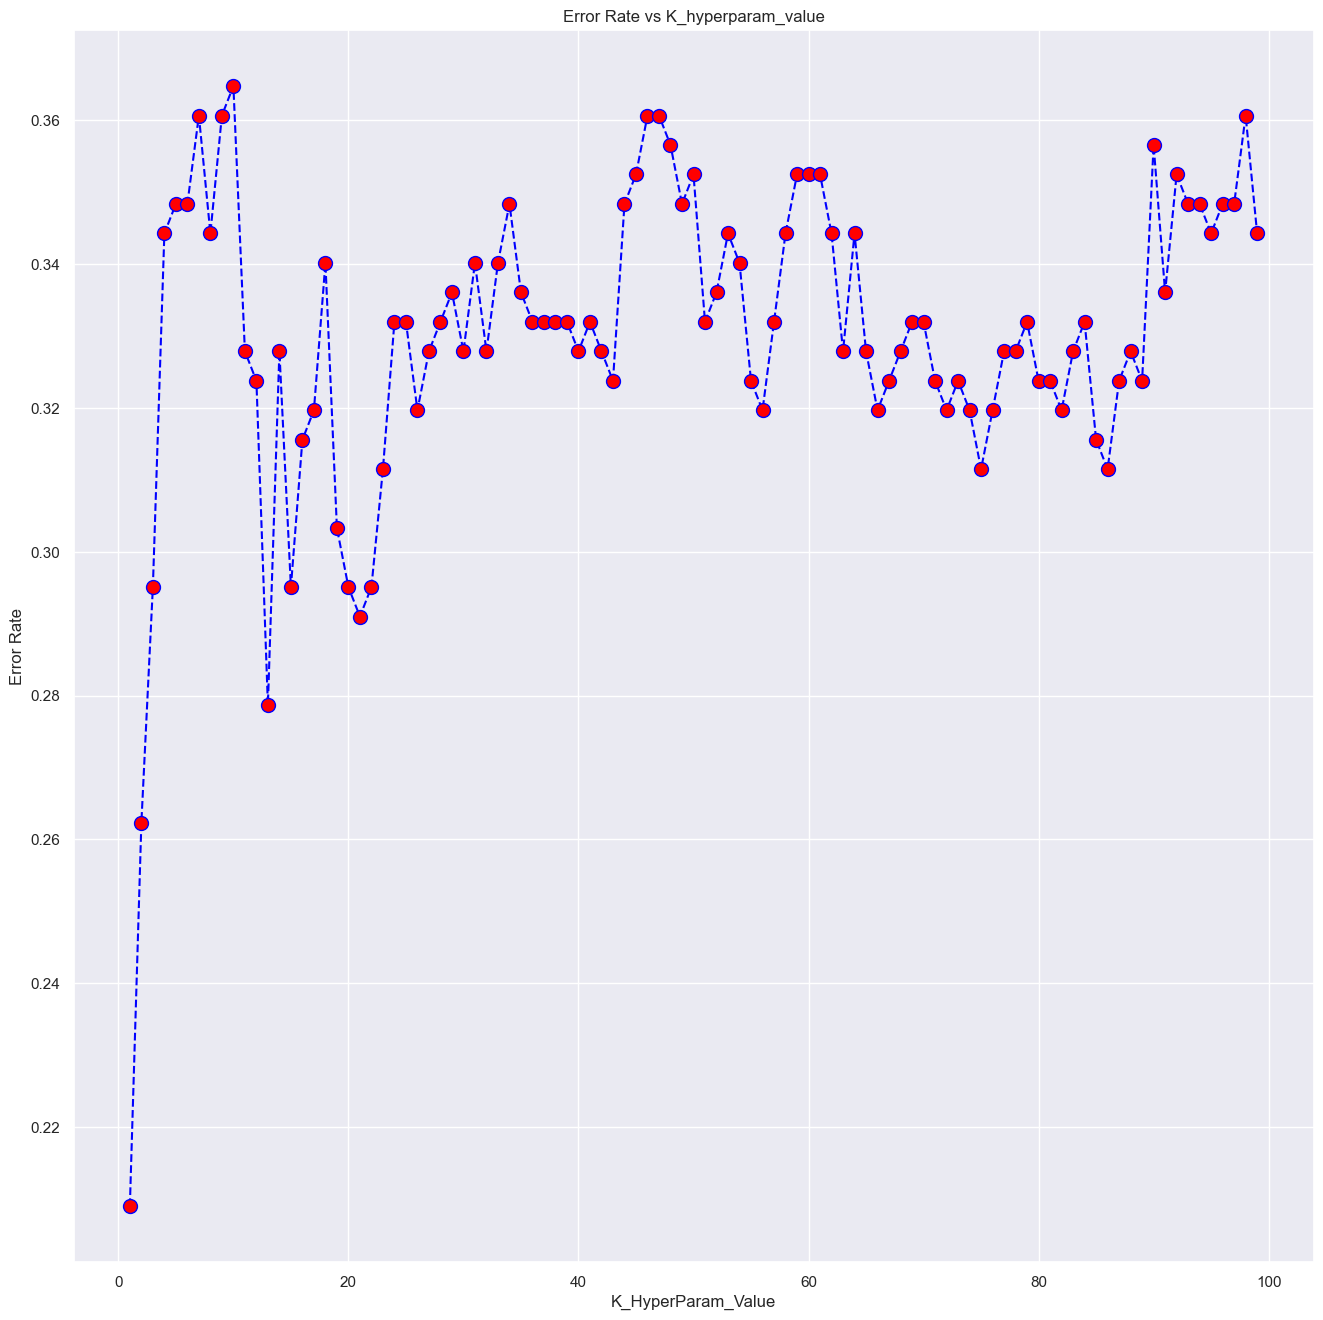

In [31]:
plt.figure(figsize=(16,16))
plt.plot(range(1,100), error_rate, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title("Error Rate vs K_hyperparam_value")
plt.xlabel("K_HyperParam_Value")
plt.ylabel("Error Rate")
plt.show()

In [32]:
# Basis analysis, error_rate would be less when we choose k=27

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [33]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [34]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [35]:
print(confusion_matrix(y_train, y_pred_train))
print("****************"*5)
print(confusion_matrix(y_test, y_pred_test))

[[151 132]
 [ 28 257]]
********************************************************************************
[[ 76  47]
 [ 21 100]]


In [36]:
print(classification_report(y_train, y_pred_train))
print("****************"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.84      0.53      0.65       283
           2       0.66      0.90      0.76       285

    accuracy                           0.72       568
   macro avg       0.75      0.72      0.71       568
weighted avg       0.75      0.72      0.71       568

********************************************************************************
              precision    recall  f1-score   support

           1       0.78      0.62      0.69       123
           2       0.68      0.83      0.75       121

    accuracy                           0.72       244
   macro avg       0.73      0.72      0.72       244
weighted avg       0.73      0.72      0.72       244



In [37]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.7183098591549296
********************************************************************************
Test Accuracy : 0.7213114754098361


In [38]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(knn, x_train, y_train, cv=10)
test_accuracy = cross_val_score(knn, x_test, y_test, cv=10)
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.6547932330827068
*******************************************************************************************************************
Test Accuracy after CV : 0.6723333333333333
